In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [124]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [125]:
# The test data does not have the survived column as it is the target variable as it is present in the train data.
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
# Check for missing data

# pclass is the proxy for socio economic status, 1-Upper, 2-Middle, 3-Lower
# Sib Sp is the sibling or the spouse count of the individual on the titanic
# Parch is the parent or the children count of the individual on the titanic
# Embarked is the port C-Cherbourg, Q-Queenstown, S-Southampton

print("The column passenger id has:",train_data['PassengerId'].isnull().sum(),"nulls")
print("The column passenger class has:",train_data['Pclass'].isnull().sum(),"nulls")
print("The column passenger sex has:",train_data['Sex'].isnull().sum(),"nulls")
print("The column passenger age has:",train_data['Age'].isnull().sum(),"nulls") 
print("The column sibling has:",train_data['SibSp'].isnull().sum(),"nulls")
print("The column parch has:",train_data['Parch'].isnull().sum(),"nulls")
print("The column ticket fare has:",train_data['Fare'].isnull().sum(),"nulls")
print("The column cabin has:",train_data['Cabin'].isnull().sum(),"nulls")
print("The column embarked has:",train_data['Embarked'].isnull().sum(),"nulls")

The column passenger id has: 0 nulls
The column passenger class has: 0 nulls
The column passenger sex has: 0 nulls
The column passenger age has: 177 nulls
The column sibling has: 0 nulls
The column parch has: 0 nulls
The column ticket fare has: 0 nulls
The column cabin has: 687 nulls
The column embarked has: 2 nulls


In [128]:
print(" Column Sibling Spouse Distribution \n",train_data['SibSp'].describe())

# To get a basic idea
train_data[train_data['SibSp']>3]

 Column Sibling Spouse Distribution 
 count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [129]:
print(" Column Parent Children Distribution \n",train_data['Parch'].describe())
train_data[train_data['Parch']>3]

 Column Parent Children Distribution 
 count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [130]:
# Overall distribution of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
# Count the total number of males and females.
print(train_data['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [132]:
# Number of nulls in column Cabin.
print("Null values in cabin column:",train_data['Cabin'].isnull().sum())

Null values in cabin column: 687


In [133]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


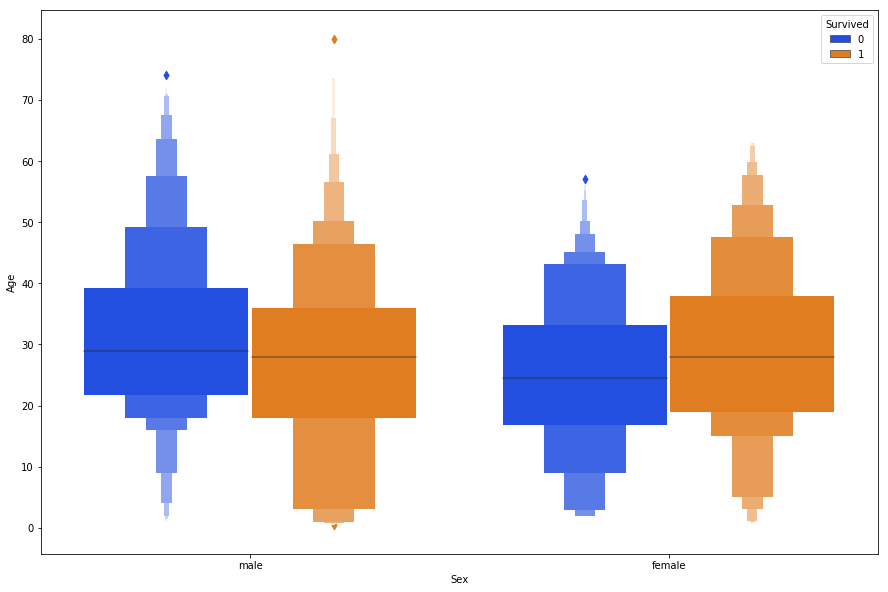

In [134]:
# Distribution of the males and females who survived and did not survive.
plt.figure(figsize=(15,10))
sns.boxenplot(x='Sex',y='Age',hue='Survived',data=train_data)

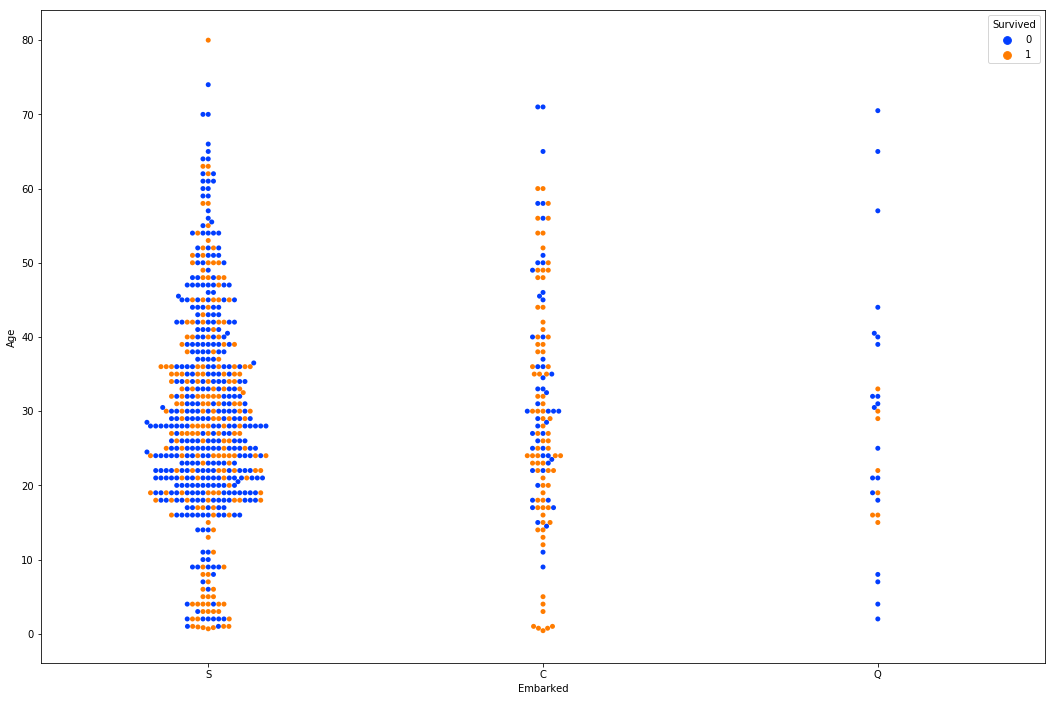

In [135]:
# Distribution of people who survived on the basis of embarked port.
sns.set_palette("bright")
plt.figure(figsize=(18,12))
sns.swarmplot(x='Embarked',y='Age',data=train_data,hue='Survived')

# People who took the ship from S are large in number and also the count of people died from Southampton is more while
# Queensburg is the least.

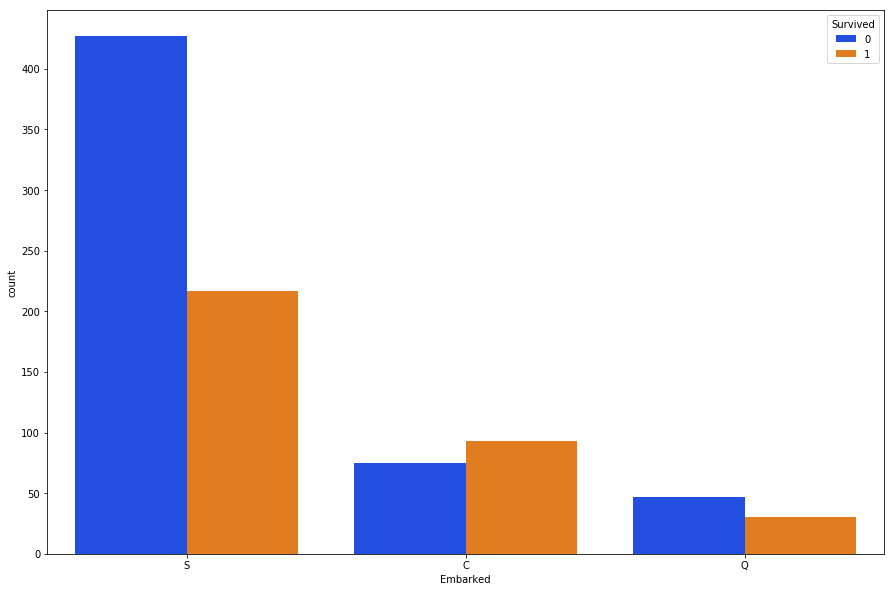

In [136]:
# bar chart of port embarked and count of people survived and not survived
plt.figure(figsize=(15,10))
sns.countplot(x='Embarked',data=train_data,hue='Survived')

C:\Users\13157\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\13157\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1080x720 with 0 Axes>

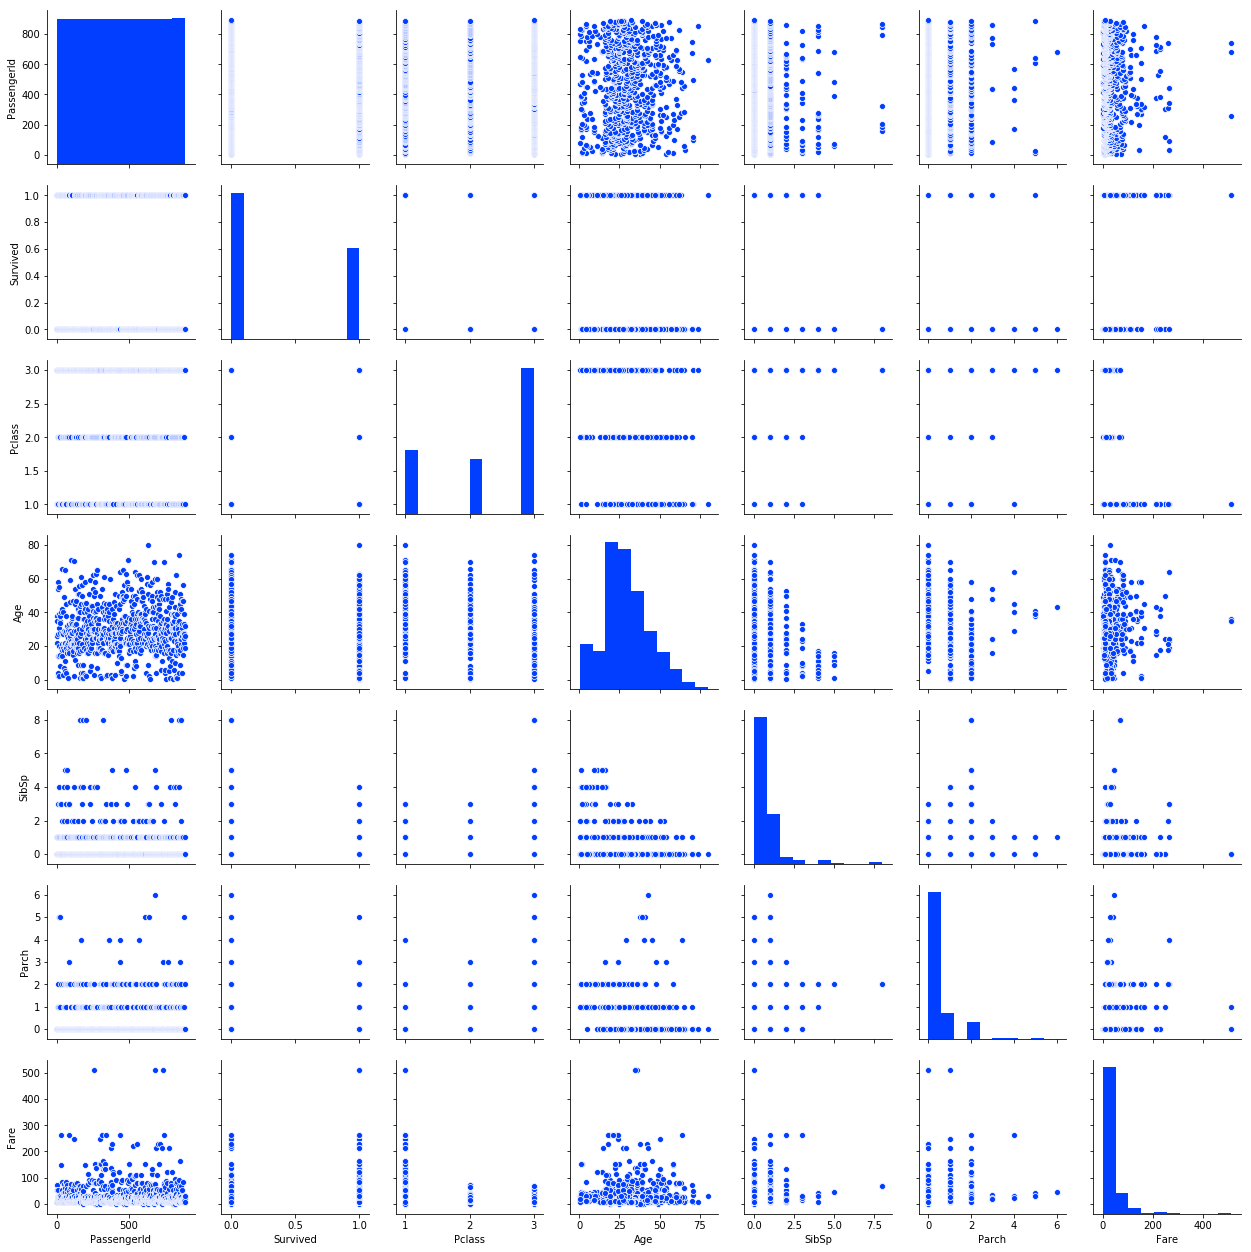

In [137]:
# To examine if there is correlation (positive or negative)
plt.figure(figsize=(15,10))
sns.pairplot(train_data)

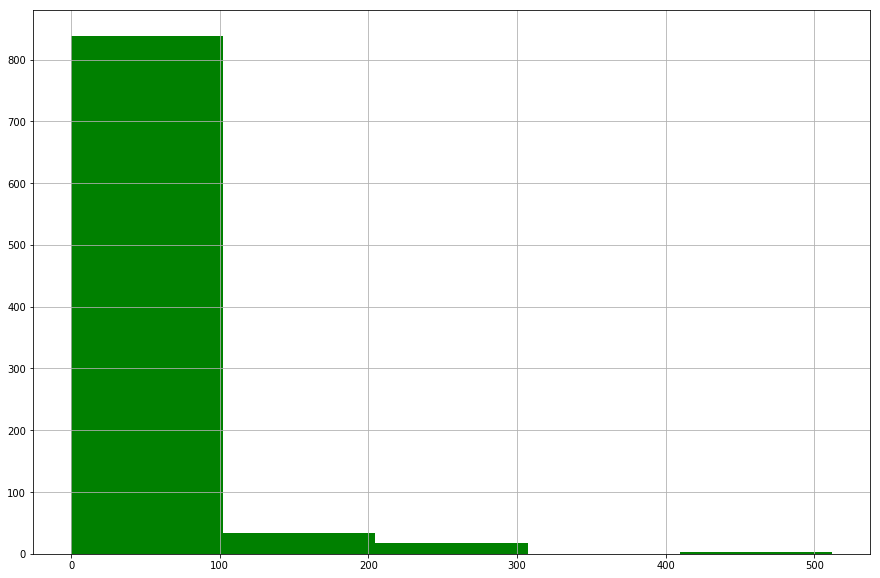

In [138]:
plt.figure(figsize=(15,10))
train_data['Fare'].dropna().astype(int).hist(bins=5,color='green')

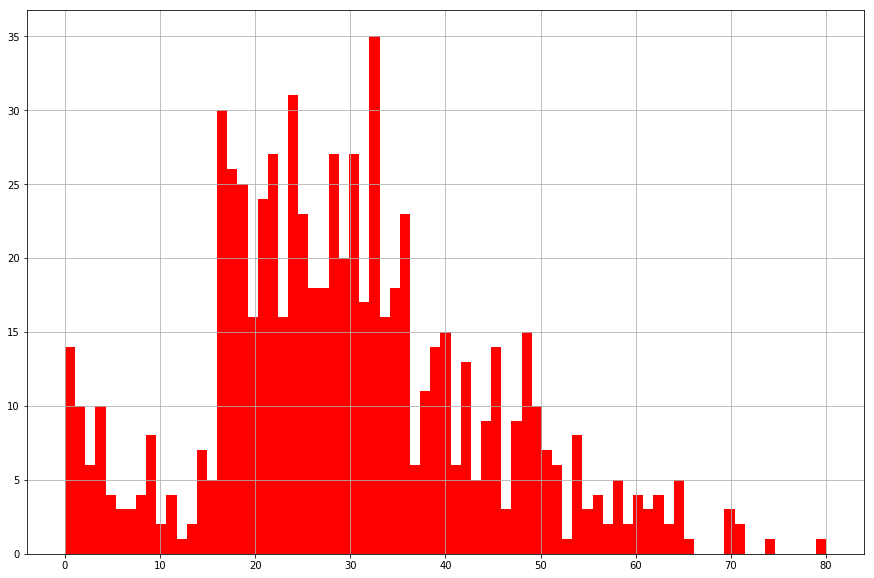

In [139]:
plt.figure(figsize=(15,10))
train_data['Age'].dropna().astype(int).hist(bins=75,color='red')

In [140]:
# Start of pre processing the data for modeling


In [141]:
# The line below is commented after a single run otherwise would give error.

train_data=train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [142]:
# Dealing with missing values in column Embarked.
# Because there were only 2 null values.
train_data['Embarked']=train_data['Embarked'].fillna('S')
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [143]:
# Dealing with the missing values in column Age
mean_age=train_data['Age'].mean()
stddev_age=train_data['Age'].std()

# Generating random numbers from the column Age
rand_numbers_age=np.random.randint((mean_age-stddev_age),(mean_age+stddev_age),train_data['Age'].isnull().sum())
print(rand_numbers_age)

# Setting the random value of ages generated to the missing values in the column.
train_data['Age'][np.isnan(train_data['Age'])]=rand_numbers_age

train_data.isnull().sum()

[18 22 21 19 38 29 43 37 37 22 22 30 43 24 18 23 15 16 42 17 26 43 17 20
 32 23 37 22 23 22 15 26 20 43 30 21 35 21 16 37 31 16 37 28 38 42 16 25
 19 23 26 36 20 17 43 24 20 19 24 26 29 31 27 23 27 35 18 17 43 27 30 36
 30 21 20 41 18 36 21 41 18 31 23 43 36 20 40 26 20 19 38 43 25 34 24 40
 39 43 30 30 27 16 42 33 27 19 34 35 19 25 42 41 15 19 15 20 31 23 41 17
 30 24 22 20 31 25 16 37 33 38 37 27 43 36 33 22 33 36 19 17 43 32 21 18
 34 38 42 20 23 31 30 16 32 24 32 20 41 40 38 35 24 41 34 24 43 27 26 17
 17 30 39 19 25 24 23 17 17]


C:\Users\13157\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [144]:
# Family includes spouse, children and siblings
train_data['Family']=train_data['Parch']+train_data['SibSp']
train_data['Family'][train_data['Family']>=1]=1
train_data['Family'][train_data['Family']==0]=0
train_data.head()

C:\Users\13157\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\13157\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [145]:
train_data['Age']=np.round(train_data['Age'])
train_data['Fare']=np.round(train_data['Fare'])
train_data['Age']=train_data['Age'].astype(int)
train_data['Fare']=train_data['Fare'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22,1,0,7,S,1
1,1,1,female,38,1,0,71,C,1
2,1,3,female,26,0,0,8,S,0
3,1,1,female,35,1,0,53,S,1
4,0,3,male,35,0,0,8,S,0


In [146]:
# Dummies for the embarked column
train_data=train_data.merge(pd.get_dummies(train_data['Embarked']),left_index=True,right_index=True)
train_data=train_data.drop('Q',axis=1)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,C,S
0,0,3,male,22,1,0,7,S,1,0,1
1,1,1,female,38,1,0,71,C,1,1,0
2,1,3,female,26,0,0,8,S,0,0,1
3,1,1,female,35,1,0,53,S,1,0,1
4,0,3,male,35,0,0,8,S,0,0,1


In [147]:
train_data=train_data.drop(['SibSp','Parch','Embarked'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Family,C,S
0,0,3,male,22,7,1,0,1
1,1,1,female,38,71,1,1,0
2,1,3,female,26,8,0,0,1
3,1,1,female,35,53,1,0,1
4,0,3,male,35,8,0,0,1


In [148]:
# Dummies for Pclass column
pclass_dummies=pd.get_dummies(train_data['Pclass'])
pclass_dummies.columns=['First Class','Second Class','Third Class']
train_data=train_data.merge(pclass_dummies,right_index=True,left_index=True)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Family,C,S,First Class,Second Class,Third Class
0,0,3,male,22,7,1,0,1,0,0,1
1,1,1,female,38,71,1,1,0,1,0,0
2,1,3,female,26,8,0,0,1,0,0,1
3,1,1,female,35,53,1,0,1,1,0,0
4,0,3,male,35,8,0,0,1,0,0,1


In [149]:
train_data=train_data.drop('Third Class',axis=1)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Family,C,S,First Class,Second Class
0,0,3,male,22,7,1,0,1,0,0
1,1,1,female,38,71,1,1,0,1,0
2,1,3,female,26,8,0,0,1,0,0
3,1,1,female,35,53,1,0,1,1,0
4,0,3,male,35,8,0,0,1,0,0


In [150]:
train_data=train_data.drop('Pclass',axis=1)

train_data.head()

,Survived,Sex,Age,Fare,Family,C,S,First Class,Second Class
0,0,male,22,7,1,0,1,0,0
1,1,female,38,71,1,1,0,1,0
2,1,female,26,8,0,0,1,0,0
3,1,female,35,53,1,0,1,1,0
4,0,male,35,8,0,0,1,0,0


In [151]:
# Moving on the logsitic regression model.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, confusion_matrix, f1_score, classification_report

# Logistic Regression model without feature scaling
X=train_data.loc[:,'Age':'Second Class']
y=train_data['Survived']

# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Defining the model
model1=LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [152]:
# Accuracy metrics
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix \n',cm,'\n')

print('ROC:',roc_auc_score(y_test,y_pred),'\n')

print('F1 score:',f1_score(y_test,y_pred),'\n')

print('Precision and Recall: \n',classification_report(y_test,y_pred))


Confusion Matrix 
 [[95 19]
 [37 28]] 

ROC: 0.632051282051282 

F1 score: 0.5 

Precision and Recall: 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       114
           1       0.60      0.43      0.50        65

   micro avg       0.69      0.69      0.69       179
   macro avg       0.66      0.63      0.64       179
weighted avg       0.67      0.69      0.67       179



In [153]:
# Now our last step would be to perform a grid search which would include regularization and gradient descent.
# We use a parameter C which is inverse of lambda which we use in regularization.
# But we can use lambda too by specifying the learning rates accordingly.

from sklearn.model_selection import GridSearchCV
penalty=['l1','l2']
C=[0.0001,0.001,0.01,0.05,0.1,1] # Learning rates (I am passing lambda itself, not the inverse)

parameters=dict(C=C,penalty=penalty)
clf=GridSearchCV(model1,parameters,cv=5)
best_model=clf.fit(X_train,y_train)
y_pred_grid=best_model.predict(X_test)


In [154]:
cm=confusion_matrix(y_test,y_pred_grid)

print('Confusion Matrix \n',cm,'\n')

print('ROC:',roc_auc_score(y_test,y_pred_grid),'\n')

print('F1 score:',f1_score(y_test,y_pred_grid),'\n')

print('Precision and Recall: \n',classification_report(y_test,y_pred_grid))

Confusion Matrix 
 [[95 19]
 [35 30]] 

ROC: 0.6474358974358975 

F1 score: 0.5263157894736843 

Precision and Recall: 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       114
           1       0.61      0.46      0.53        65

   micro avg       0.70      0.70      0.70       179
   macro avg       0.67      0.65      0.65       179
weighted avg       0.69      0.70      0.69       179



### We cannot use feature scaling because it would distort the dummy variables.
### Grid Search does not always yield better results.
### There are other ways we can prepocess the data like if age is < 16 then classify them as child.
### We can generate interaction variables like Fare(Family) or Age(Family)

In [155]:
def get_person(passenger):
    age,sex=passenger
    if age<16:
        return 'Child'
    else:
        return sex
    
train_data['Person']=train_data[['Age','Sex']].apply(get_person,axis=1)
train_data.head()

,Survived,Sex,Age,Fare,Family,C,S,First Class,Second Class,Person
0,0,male,22,7,1,0,1,0,0,male
1,1,female,38,71,1,1,0,1,0,female
2,1,female,26,8,0,0,1,0,0,female
3,1,female,35,53,1,0,1,1,0,female
4,0,male,35,8,0,0,1,0,0,male


In [156]:
train_data=train_data.drop('Sex',axis=1)
train_data.head()

,Survived,Age,Fare,Family,C,S,First Class,Second Class,Person
0,0,22,7,1,0,1,0,0,male
1,1,38,71,1,1,0,1,0,female
2,1,26,8,0,0,1,0,0,female
3,1,35,53,1,0,1,1,0,female
4,0,35,8,0,0,1,0,0,male


In [157]:
person_dummy=pd.get_dummies(train_data['Person'])
person_dummy.columns=['Child','Female','Male']
person_dummy=person_dummy.drop('Female',axis=1)

train_data=train_data.join(person_dummy)
train_data.head()

,Survived,Age,Fare,Family,C,S,First Class,Second Class,Person,Child,Male
0,0,22,7,1,0,1,0,0,male,0,1
1,1,38,71,1,1,0,1,0,female,0,0
2,1,26,8,0,0,1,0,0,female,0,0
3,1,35,53,1,0,1,1,0,female,0,0
4,0,35,8,0,0,1,0,0,male,0,1


In [158]:
train_data=train_data.drop('Person',axis=1)
train_data.head()

,Survived,Age,Fare,Family,C,S,First Class,Second Class,Child,Male
0,0,22,7,1,0,1,0,0,0,1
1,1,38,71,1,1,0,1,0,0,0
2,1,26,8,0,0,1,0,0,0,0
3,1,35,53,1,0,1,1,0,0,0
4,0,35,8,0,0,1,0,0,0,1


In [181]:
X_b=train_data.loc[:,'Age':'Male']
y_b=train_data['Survived']

# Splitting the data into train and test
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_b,y_b,test_size=0.2)

# Defining the model
model2=LogisticRegression(solver='liblinear')
model2.fit(X_train_b,y_train_b)
y_pred=model2.predict(X_test_b)

In [182]:
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix \n',cm,'\n')

print('ROC:',roc_auc_score(y_test_b,y_pred),'\n')

print('F1 score:',f1_score(y_test_b,y_pred),'\n')

print('Precision and Recall: \n',classification_report(y_test_b,y_pred))


Confusion Matrix 
 [[64 44]
 [43 28]] 

ROC: 0.8137065637065637 

F1 score: 0.7808219178082192 

Precision and Recall: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [167]:
train_data['Age*Fare']=train_data['Age']*train_data['Fare']
train_data.head()

,Survived,Age,Fare,Family,C,S,First Class,Second Class,Child,Male,Age*Family,Age*Fare
0,0,22,7,1,0,1,0,0,0,1,22,154
1,1,38,71,1,1,0,1,0,0,0,38,2698
2,1,26,8,0,0,1,0,0,0,0,0,208
3,1,35,53,1,0,1,1,0,0,0,35,1855
4,0,35,8,0,0,1,0,0,0,1,0,280


In [165]:
X=train_data.loc[:,'Age':'Age*Family']
y=train_data['Survived']

# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Defining the model
model1=LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [166]:
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix \n',cm,'\n')

print('ROC:',roc_auc_score(y_test,y_pred),'\n')

print('F1 score:',f1_score(y_test,y_pred),'\n')

print('Precision and Recall: \n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[92 10]
 [28 49]] 

ROC: 0.7691622103386809 

F1 score: 0.7205882352941178 

Precision and Recall: 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       102
           1       0.83      0.64      0.72        77

   micro avg       0.79      0.79      0.79       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



In [169]:
X=train_data.loc[:,'Age':'Age*Fare']
y=train_data['Survived']

# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Defining the model
model1=LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [170]:
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix \n',cm,'\n')

print('ROC:',roc_auc_score(y_test,y_pred),'\n')

print('F1 score:',f1_score(y_test,y_pred),'\n')

print('Precision and Recall: \n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[90 18]
 [27 44]] 

ROC: 0.7265258215962441 

F1 score: 0.6616541353383459 

Precision and Recall: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       108
           1       0.71      0.62      0.66        71

   micro avg       0.75      0.75      0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



### So there is no improvement in the accuracy and precision when we include interaction variables

In [187]:
# Grid Search for the model where we get the best precision and recall.
penalty=['l1','l2']
C=[0.0001,0.001,0.01,0.05,0.1,1] # Learning rates (I am passing lambda itself, not the inverse)

parameters=dict(C=C,penalty=penalty)
clf=GridSearchCV(model2,parameters,cv=10)
best_model=clf.fit(X_train_b,y_train_b)
y_pred_grid_b=best_model.predict(X_test_b)


C:\Users\13157\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [188]:
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix \n',cm,'\n')

print('ROC:',roc_auc_score(y_test_b,y_pred_grid_b),'\n')

print('F1 score:',f1_score(y_test_b,y_pred_grid_b),'\n')

print('Precision and Recall: \n',classification_report(y_test_b,y_pred_grid_b))

Confusion Matrix 
 [[64 44]
 [43 28]] 

ROC: 0.8089446589446588 

F1 score: 0.7755102040816327 

Precision and Recall: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

